<a href="https://colab.research.google.com/github/kabir993/chandan-goswami-854331/blob/main/fraud_detection_new_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df=pd.read_csv('/content/capstone project fraud detection.csv')

In [90]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [92]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.095390e+06,6.159017e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.550005e+05,1.101147e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.923541e+06,3.408166e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327682e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442704e+05,9.431247e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [93]:
df.isnull().sum()

,0
step,0
type,203603
amount,0
nameOrig,203603
oldbalanceOrg,0
newbalanceOrig,267230
nameDest,0
oldbalanceDest,203603
newbalanceDest,0
isFraud,0


In [94]:
for i in df.select_dtypes(include='object').columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

<ipython-input-94-ae6d7f1ef74f>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [42]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,1
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,1
isFraud,1


In [95]:
df.select_dtypes(include='float64').columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [96]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy="mean")

data_to_impute = df[['newbalanceOrig', 'oldbalanceDest']]

imputed_data = si.fit_transform(data_to_impute)


df[['newbalanceOrig', 'oldbalanceDest']] = imputed_data

<Axes: >

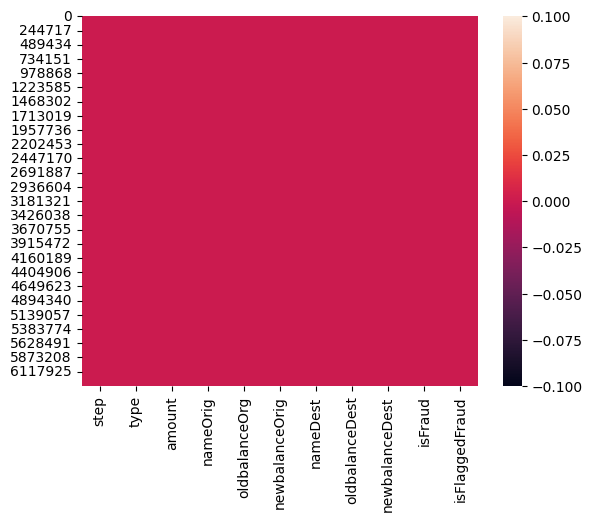

In [97]:
sns.heatmap(df.isnull()) #filled with data

In [98]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [99]:
df['oldbalanceOrg'].fillna(0, inplace=True)
df['newbalanceDest'].fillna(0, inplace=True)
df['isFraud'].fillna(0, inplace=True)
df['isFlaggedFraud'].fillna(0, inplace=True)


<ipython-input-99-6855d266e149>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-99-6855d266e149>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [100]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [101]:
type=df['type'].value_counts()

In [102]:
transcation=type.index

In [103]:
quantity=type.values

In [104]:
import plotly.express as px

In [106]:
px.pie(df,values=quantity,names=transcation,title='type of transaction')

In [107]:
type

,count
type,
CASH_OUT,2369471
PAYMENT,2082597
CASH_IN,1354742
TRANSFER,515688
DEBIT,40122


In [109]:
df.replace(to_replace=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'],value=[1,2,3,4,5],inplace=True)

In [110]:
df['isFraud']=df['isFraud'].map({0:'No Fraud',1:'Fraud'})

In [111]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,No Fraud,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,No Fraud,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,No Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,Fraud,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,Fraud,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,Fraud,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,Fraud,0


In [112]:
x=df[['type','amount','oldbalanceOrg','newbalanceOrig']]
y=df.iloc[:,-2]

In [113]:
y

,isFraud
0,No Fraud
1,No Fraud
2,Fraud
3,Fraud
4,No Fraud
...,...
6362615,Fraud
6362616,Fraud
6362617,Fraud
6362618,Fraud


In [114]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [116]:
model=DecisionTreeClassifier()


In [117]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [118]:
model.score(xtest,ytest)*100

99.96487296113865

In [119]:
model.score(xtrain,ytrain)*100

99.99998035400512

In [120]:
x

,type,amount,oldbalanceOrg,newbalanceOrig
0,2,9839.64,170136.00,160296.36
1,2,1864.28,21249.00,19384.72
2,4,181.00,181.00,0.00
3,1,181.00,181.00,0.00
4,2,11668.14,41554.00,29885.86
...,...,...,...,...
6362615,1,339682.13,339682.13,0.00
6362616,4,6311409.28,6311409.28,0.00
6362617,1,6311409.28,6311409.28,0.00
6362618,4,850002.52,850002.52,0.00


In [121]:
model.predict([[2	,9839.64	,170136.00	,160296.36]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array(['No Fraud'], dtype=object)

In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
y_pred = model.predict(xtest)

In [126]:
cm = confusion_matrix(ytest, y_pred)

In [127]:
print(cm)

[[   1388     232]
 [    215 1270689]]


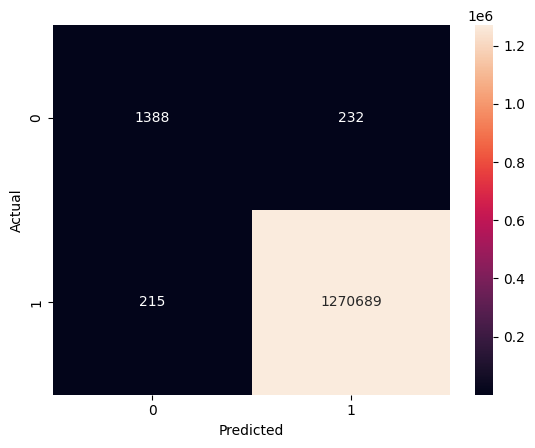

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [129]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print(classification_report(ytest, y_pred))
print("Accuracy:", accuracy_score(ytest, y_pred))
print("ROC-AUC:", roc_auc_score(ytest, model.predict_proba(xtest)[:,1]))


              precision    recall  f1-score   support

       Fraud       0.87      0.86      0.86      1620
    No Fraud       1.00      1.00      1.00   1270904

    accuracy                           1.00   1272524
   macro avg       0.93      0.93      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524

Accuracy: 0.9996487296113865
ROC-AUC: 0.9283104762679669
